In [1]:
%run EUVIP_1_defaults.ipynb

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213]
Range of angles (in degrees):  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Final sparseness in the representation = 0.0026041666666666665
Final sparseness in the pyramid = 0.375


In [2]:
%pwd


'/Users/lolo/quantic/science/Perrinet16EUVIP/test'

## exploring sparseness of one sample image: Lena

A simple example on the classical Lena image  of the sparse coding procedure. Let's start by loading the image and applying a circular mask to avoid border effects:

-0.950759120364 0.891900615494


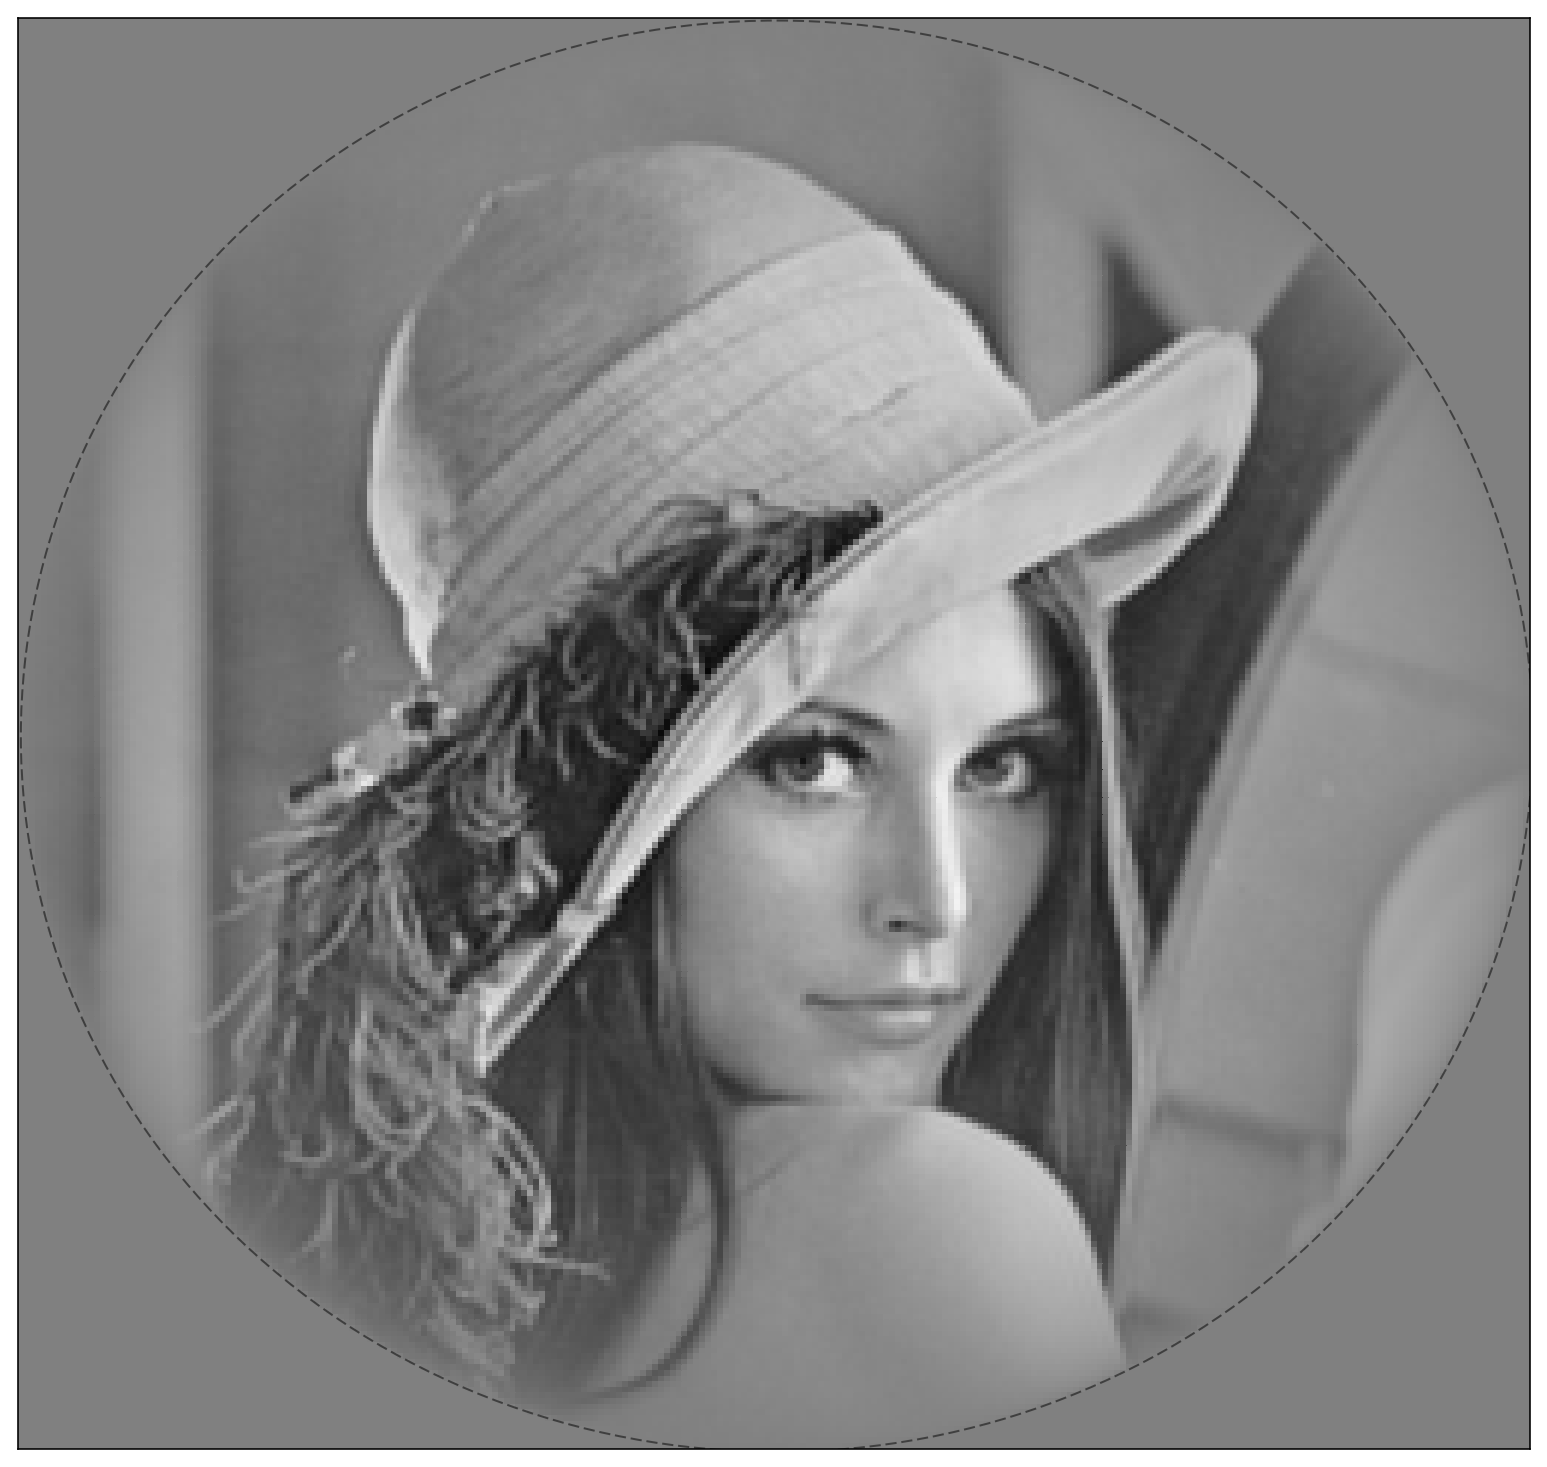

In [3]:
%cd -q ../test/

mp = SparseEdges(parameter_file)
image = mp.imread(lena_file)
mp.pe.N = N
mp.pe.mask_exponent = 4.
mp.pe.line_width = 3.
mp.pe.figsize_edges = fig_width
mp.pe.figpath = '../docs/'
mp.init()
image = mp.normalize(image, center=False)
image *= mp.mask
print(image.min(), image.max())
fig, ax = mp.imshow(image, mask=True, norm=False)

In [4]:
name = experiment.replace('sparseness', 'lena')
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=False)
    np.save(matname, edges)    

    
matname = os.path.join(mp.pe.matpath, name + '_rec.npy')
try:
    image_rec = np.load(matname)
except:
    image_rec = mp.reconstruct(edges, mask=True)        
    np.save(matname, image_rec)    
    

In [5]:
print(matname)

data_cache/EUVIP-lena_rec.npy


The stored parameters are:

In [6]:
mp.pe

{'B_sf': 0.4,
 'B_theta': 0.17453277777777776,
 'C_range_begin': -5,
 'C_range_end': 10.0,
 'MP_alpha': 0.7,
 'MP_do_mask': True,
 'MP_rho': None,
 'N': 4096,
 'N_Dtheta': 24,
 'N_X': 256,
 'N_Y': 256,
 'N_image': None,
 'N_phi': 12,
 'N_r': 6,
 'N_scale': 5,
 'N_svm_cv': 50,
 'N_svm_grid': 32,
 'base_levels': 1.618,
 'd_max': 2.0,
 'd_min': 0.5,
 'd_width': 45.0,
 'datapath': 'database',
 'dip_B_psi': 0.1,
 'dip_B_theta': 1.0,
 'dip_epsilon': 0.5,
 'dip_scale': 1.5,
 'dip_w': 0.2,
 'do_edgedir': False,
 'do_mask': True,
 'do_rank': False,
 'do_whitening': True,
 'dpi': 450,
 'edge_mask': True,
 'edge_scale_chevrons': 180.0,
 'edgefigpath': 'results/edges',
 'edgematpath': 'data_cache/edges',
 'eta_SO': 0.0,
 'figpath': '../docs/',
 'figsize': 14.0,
 'figsize_cohist': 8,
 'figsize_edges': 3.3762280337622803,
 'figsize_hist': 8,
 'formats': ['png', 'pdf', 'svg', 'jpg'],
 'gamma_range_begin': -14,
 'gamma_range_end': 3,
 'kappa_phase': 0.0,
 'line_width': 3.0,
 'line_width_chevrons': 0.7

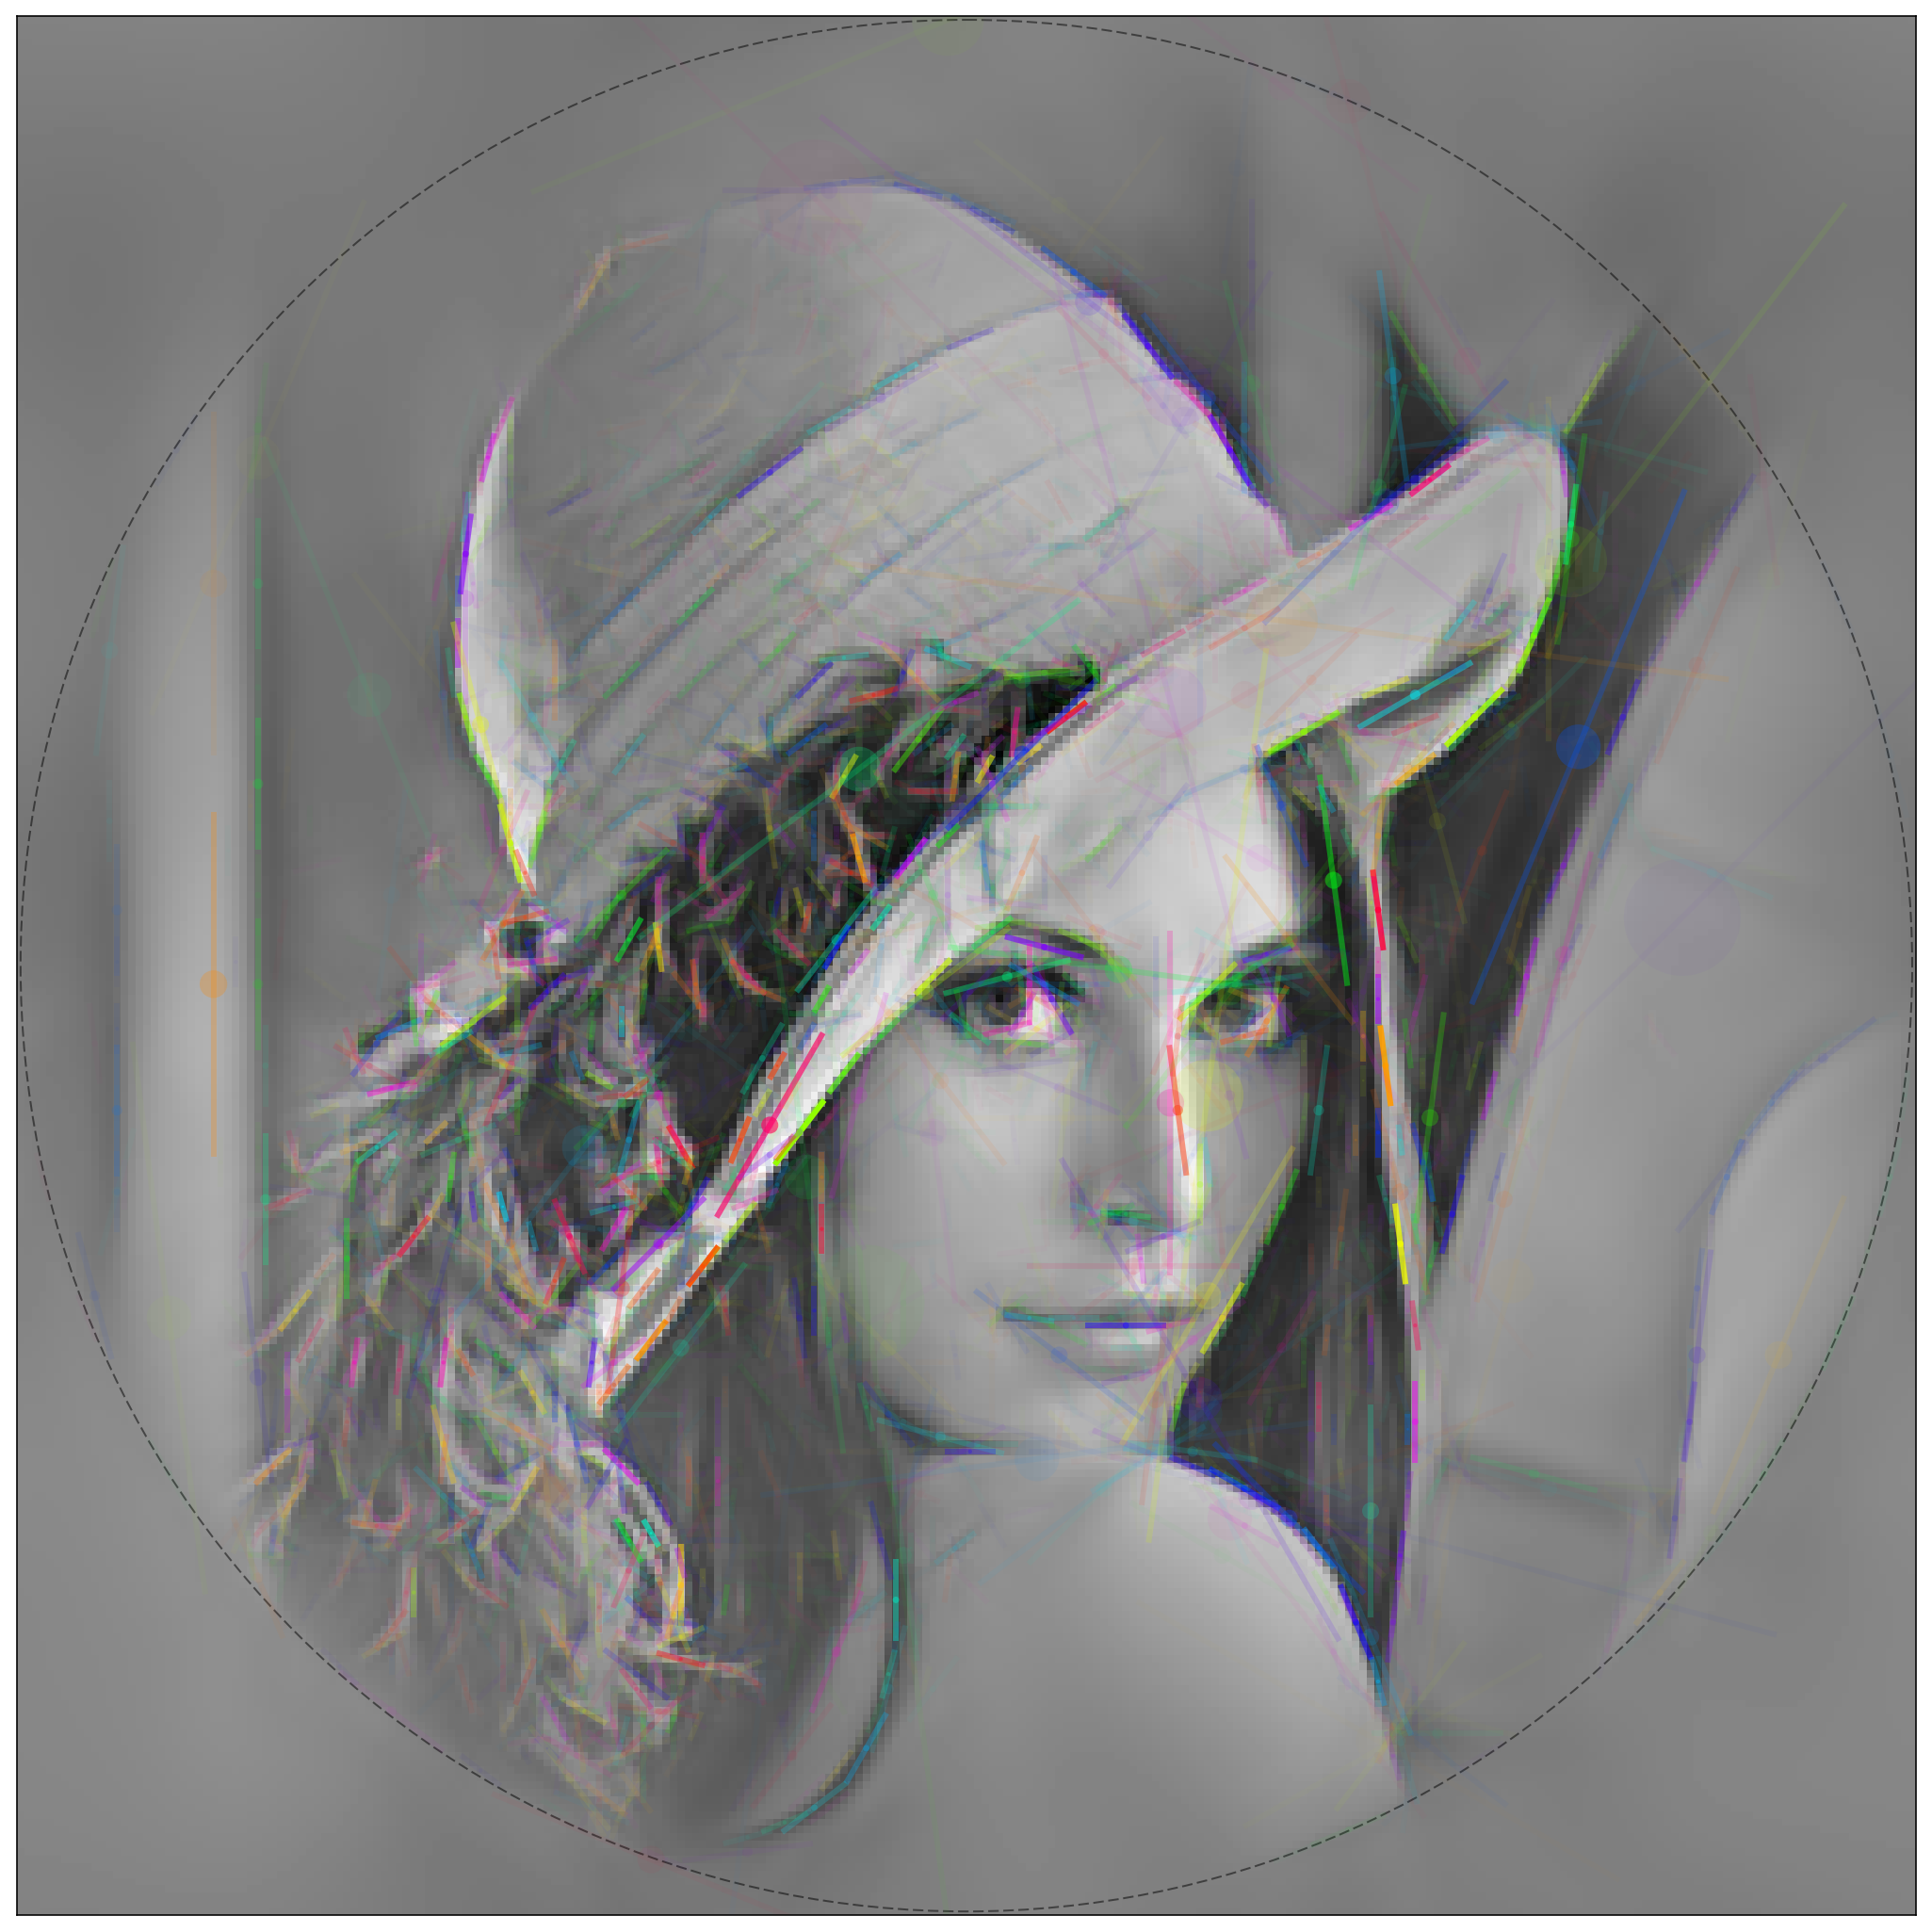

In [7]:
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), mask=True)#show_phase=False, 
mp.savefig(fig, name);

In [8]:
#list_of_number_of_edge =  np.logspace(0, 11, i, base=2)
#list_of_number_of_edge =  4**np.arange(6)
list_of_number_of_edge =  2* 4**np.arange(6)
print(list_of_number_of_edge)

[   2    8   32  128  512 2048]


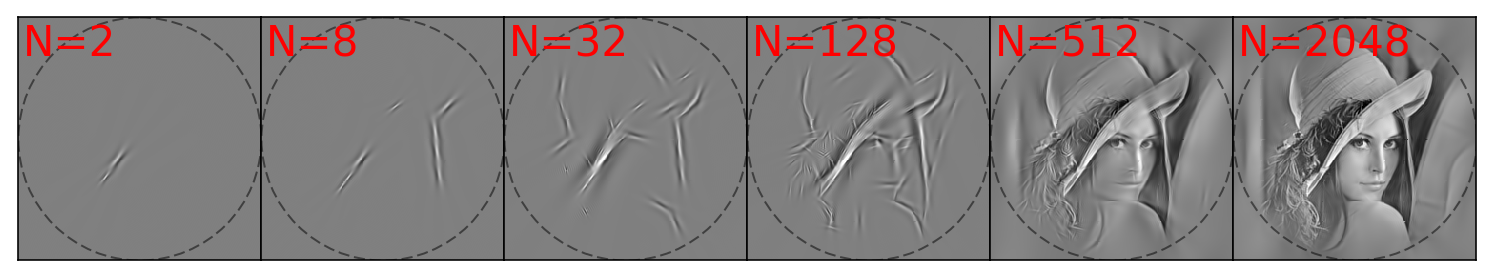

In [9]:
fig, axs = plt.subplots(1, len(list_of_number_of_edge), figsize=(3*fig_width, 3*fig_width/len(list_of_number_of_edge)))
vmax = 1.
image_rec = mp.reconstruct(edges, mask=True)        
vmax = mp.dewhitening(image_rec).max()
for i_ax, number_of_edge in enumerate(list_of_number_of_edge):
    edges_ = edges[:, :number_of_edge][..., np.newaxis]
    image_rec = mp.dewhitening(mp.reconstruct(edges_, mask=True))
    fig, axs[i_ax] = mp.imshow(image_rec/vmax, fig=fig, ax=axs[i_ax], norm=False, mask=True)
    axs[i_ax].text(5, 40, 'N=%d' % number_of_edge, color='red', fontsize=21)
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
mp.savefig(fig, name + '_movie');

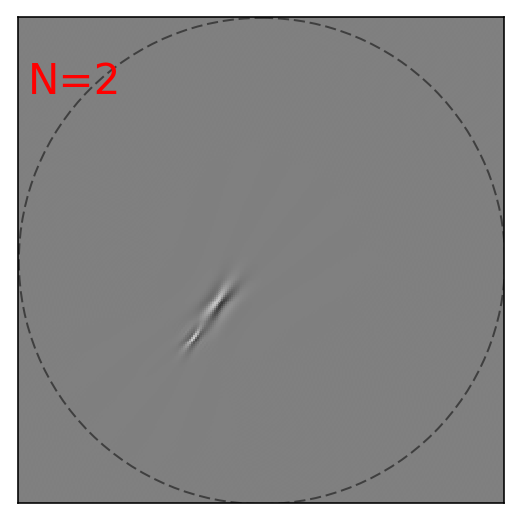

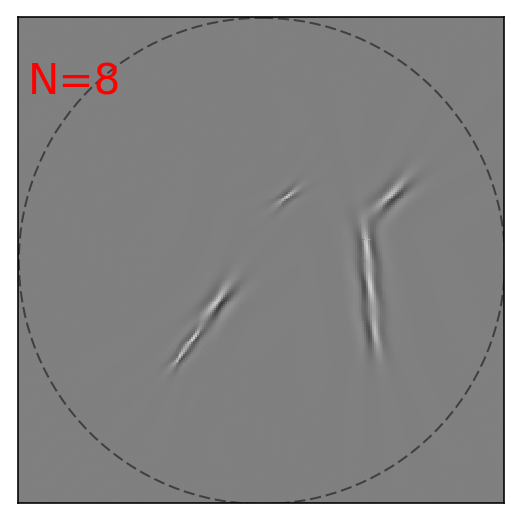

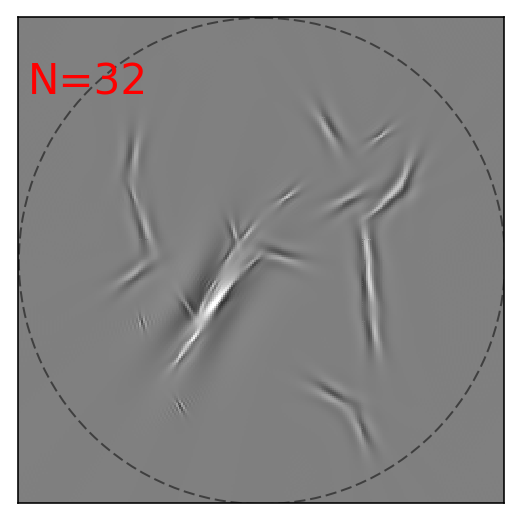

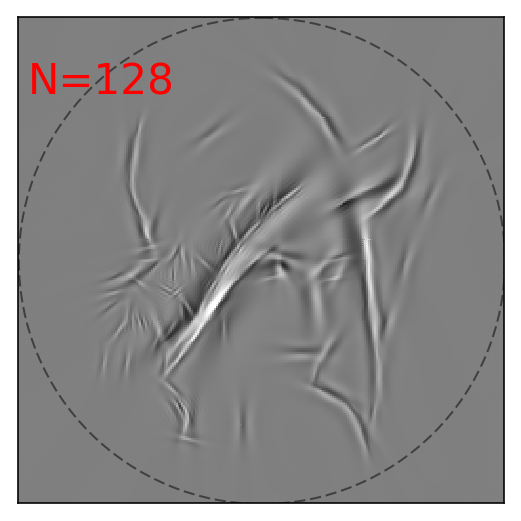

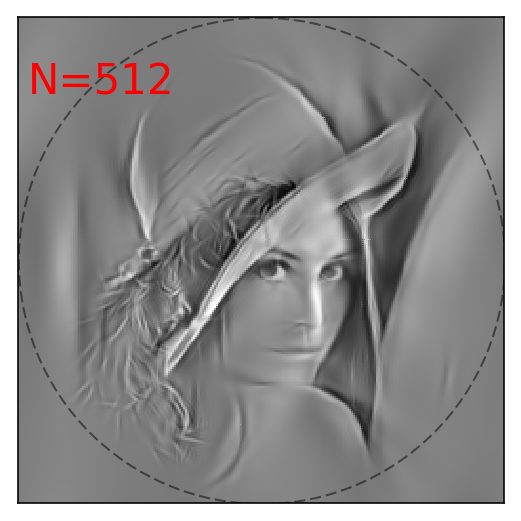

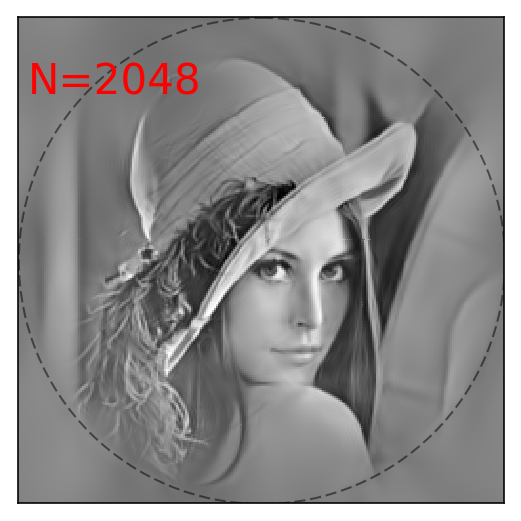

In [10]:
vmax = 1.
image_rec = mp.reconstruct(edges, mask=True)        
vmax = mp.dewhitening(image_rec).max()
for i_ax, number_of_edge in enumerate(list_of_number_of_edge):
    fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width))
    edges_ = edges[:, :number_of_edge][..., np.newaxis]
    image_rec = mp.dewhitening(mp.reconstruct(edges_, mask=True))
    fig, ax = mp.imshow(image_rec/vmax, fig=fig, ax=ax, norm=False, mask=True)
    ax.text(5, 40, 'N=%d' % number_of_edge, color='red', fontsize=21)
    plt.tight_layout()
    fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

    mp.savefig(fig, name + '_movie_N' + str(number_of_edge), formats=['png']);

In [11]:
%cd -q ../notebooks/